In [1]:
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

trainset = datasets.MNIST('MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [2]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


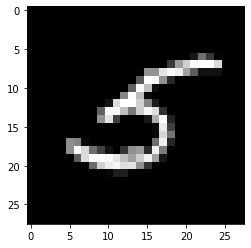

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[3].numpy().squeeze(), cmap="Greys_r")

### Defining Neural network

In [4]:
def activation(x):
    return 1/(1+torch.exp(-x))
    
##Flatten the input images
inputs = images.view(images.shape[0], -1)

##Defining weights and bias
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1)+b1) #input layer
output = torch.mm(h, w2)+b2  #hidden layer

print(output.shape)

torch.Size([64, 10])


### Building model with nn Module

In [5]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super.__init__()
        
        self.hidden = nn.Linear(784, 256)
        
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.sigmoid()
        self.softmax = nn.softmax()
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        x = self.sigmoid(x)
        x = self.softmax(x)
        
        return x

## Building Feed forward network

In [7]:
# Model Building
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10))

#Defining Loss
criteron = nn.CrossEntropyLoss()

#Getting data
images,labels = next(iter(trainloader))

#Flattening image
images = images.view(images.shape[0], -1)

#Forward pass, get out logits
logits = model(images)

loss = criteron(logits, labels)

print(loss)

tensor(2.3046, grad_fn=<NllLossBackward>)


## Using PyTorch Autograd to calculate gradients



In [10]:
t = torch.randn(2,2, requires_grad=True)

In [11]:
t

tensor([[ 1.2873,  0.6066],
        [-0.7125,  2.0788]], requires_grad=True)